# Linking creatinine-to-body weight ratio with diabetes incidence: a multiethnic Malaysian study

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from statannot import add_stat_annotation
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Folder paths
data_path = "/Users/Windows10/jupyter/cre_bw/in/"
out_path = "/Users/Windows10/jupyter/cre_bw/out/"

### Fig. 2: DM incident line plot

In [3]:
# Load the data
df = pd.read_csv(data_path + "df_incident.csv")
df_overall = df[df['group'] == 'Overall']

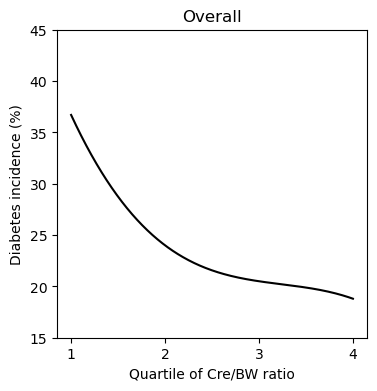

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
df = pd.read_csv(data_path + "df_incident.csv")
df_overall = df[df['group'] == 'Overall']

# Sort the data by 'q' to ensure proper smoothing
df_overall = df_overall.sort_values('q')

# Create a smooth spline curve
spline = UnivariateSpline(df_overall['q'], df_overall['inc'], s=1)  # s is the smoothing factor

# Generate smooth x values for plotting
x_smooth = np.linspace(df_overall['q'].min(), df_overall['q'].max(), 500)
y_smooth = spline(x_smooth)

# Create a line plot
plt.figure(figsize=(4, 4))

# Plot the smooth curve
plt.plot(x_smooth, y_smooth, color='#000000', label='Smooth Curve')

# Set plot title and labels
plt.title('Overall')
plt.xlabel('Quartile of Cre/BW ratio')
plt.ylabel('Diabetes incidence (%)')
plt.ylim(15, 45) 
plt.xticks([1, 2, 3, 4])
plt.grid(False)

# Optionally, add a legend
# plt.legend()

# Show the plot
plt.savefig(out_path + "inc_overall.pdf", bbox_inches="tight", dpi=600)
plt.show()

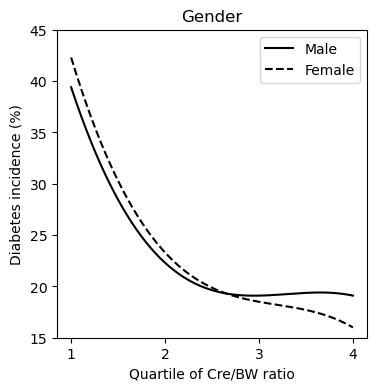

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Load the data
df = pd.read_csv(data_path + "df_incident.csv")

# Filter for Male and Female groups and sort by 'q'
df_male = df[df['group'] == 'Male'].sort_values(by='q')
df_female = df[df['group'] == 'Female'].sort_values(by='q')

# Create a figure for the plot
plt.figure(figsize=(4, 4))

# Create a smooth curve for male
spline_male = UnivariateSpline(df_male['q'], df_male['inc'], s=1)  # s is the smoothing factor
x_smooth_male = np.linspace(df_male['q'].min(), df_male['q'].max(), 500)
y_smooth_male = spline_male(x_smooth_male)

# Plot the smooth curve for male with a solid line
plt.plot(x_smooth_male, y_smooth_male, color='black', linestyle='-', label='Male')  # Changed color and added label

# Create a smooth curve for female
spline_female = UnivariateSpline(df_female['q'], df_female['inc'], s=1)  # s is the smoothing factor
x_smooth_female = np.linspace(df_female['q'].min(), df_female['q'].max(), 500)
y_smooth_female = spline_female(x_smooth_female)

# Plot the smooth curve for female with a dashed line
plt.plot(x_smooth_female, y_smooth_female, color='black', linestyle='--', label='Female')  # Changed color and added label

# Set plot title and labels
plt.title('Gender')
plt.xlabel('Quartile of Cre/BW ratio')
plt.ylabel('Diabetes incidence (%)')
plt.ylim(15, 45) 
plt.xticks([1, 2, 3, 4])
plt.grid(False)

# Add a legend to differentiate between male and female
plt.legend()

# Save the plot
plt.savefig(out_path + "inc_gender.pdf", bbox_inches="tight", dpi=600)

# Show the plot
plt.show()

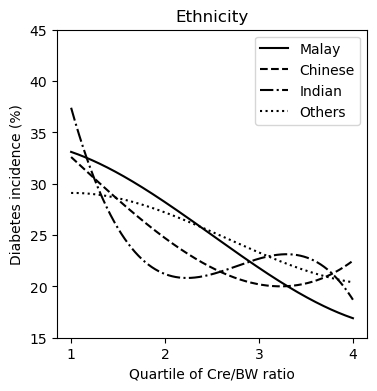

In [6]:
# Filter for different ethnic groups
df_malay = df[df['group'] == 'Malay'].sort_values(by='q')
df_chinese = df[df['group'] == 'Chinese'].sort_values(by='q')
df_indian = df[df['group'] == 'Indian'].sort_values(by='q')
df_others = df[df['group'] == 'Others'].sort_values(by='q')

# Create a figure for the plot
plt.figure(figsize=(4, 4))

# Create a smooth curve for Malay
spline_malay = UnivariateSpline(df_malay['q'], df_malay['inc'], s=1)  # s is the smoothing factor
x_smooth_malay = np.linspace(df_malay['q'].min(), df_malay['q'].max(), 500)
y_smooth_malay = spline_malay(x_smooth_malay)

# Plot the smooth curve for Malay
plt.plot(x_smooth_malay, y_smooth_malay, color='black', linestyle='-', label='Malay')

# Create a smooth curve for Chinese
spline_chinese = UnivariateSpline(df_chinese['q'], df_chinese['inc'], s=1)  # s is the smoothing factor
x_smooth_chinese = np.linspace(df_chinese['q'].min(), df_chinese['q'].max(), 500)
y_smooth_chinese = spline_chinese(x_smooth_chinese)

# Plot the smooth curve for Chinese
plt.plot(x_smooth_chinese, y_smooth_chinese, color='black', linestyle='--', label='Chinese')

# Create a smooth curve for Indian
spline_indian = UnivariateSpline(df_indian['q'], df_indian['inc'], s=1)  # s is the smoothing factor
x_smooth_indian = np.linspace(df_indian['q'].min(), df_indian['q'].max(), 500)
y_smooth_indian = spline_indian(x_smooth_indian)

# Plot the smooth curve for Indian
plt.plot(x_smooth_indian, y_smooth_indian, color='black', linestyle='-.', label='Indian')  # Changed color and added label

# Create a smooth curve for Others
spline_others = UnivariateSpline(df_others['q'], df_others['inc'], s=1)  # s is the smoothing factor
x_smooth_others = np.linspace(df_others['q'].min(), df_others['q'].max(), 500)
y_smooth_others = spline_others(x_smooth_others)

# Plot the smooth curve for Others
plt.plot(x_smooth_others, y_smooth_others, color='black', linestyle=':', label='Others')  # Changed color and added label

# Set plot title and labels
plt.title('Ethnicity')
plt.xlabel('Quartile of Cre/BW ratio')
plt.ylabel('Diabetes incidence (%)')
plt.ylim(15, 45) 
plt.xticks([1, 2, 3, 4])
plt.grid(False)

# Add a legend to differentiate between groups
plt.legend()

# Show the plot
plt.savefig(out_path + "inc_ethinic.pdf", bbox_inches="tight", dpi=600)
plt.show()

### Fig. 3: Hazard ratio line plot

In [7]:
# Load the data
df = pd.read_csv(data_path + "line.csv")

# Calculate error values
#df['y_err_lower'] = df['HR'] - df['CI_lower']
#df['y_err_upper'] = df['CI_upper'] - df['HR']
#df.to_csv(data_path + 'df_hr.csv', index=False)

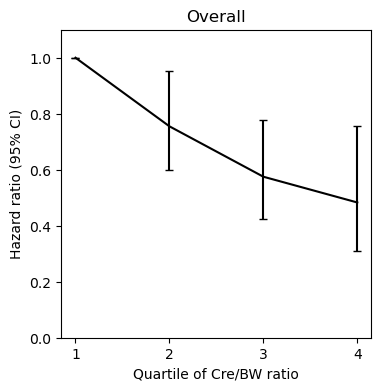

In [8]:
# Line plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(data_path + "df_hr.csv")

# Filter for 'Overall' group
df_overall = df[df['group'] == 'Overall']

# Create a line plot with error bars
plt.figure(figsize=(4, 4))

# Use a color that contrasts with the background
plt.errorbar(df_overall['Quartile'], df_overall['HR'], 
             yerr=[df_overall['y_err_lower'], df_overall['y_err_upper']],
             color='#000000', capsize=3, label='Mean with 95% CI')  # Changed color

# Set plot title and labels
plt.title('Overall')
plt.xlabel('Quartile of Cre/BW ratio')
plt.ylabel('Hazard ratio (95% CI)')
plt.ylim(0, 1.1)
plt.xticks([1, 2, 3, 4]) 
plt.grid(False)
#plt.legend()
plt.savefig(out_path + "hr_overall.pdf", bbox_inches="tight", dpi=600)
plt.show()

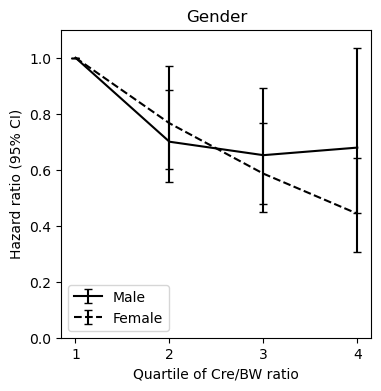

In [9]:
# Filter for 'Male' and 'Female' groups
df_male = df[df['group'] == 'Male']
df_female = df[df['group'] == 'Female']

# Create a line plot with error bars
plt.figure(figsize=(4, 4))

# Plot for Male group
plt.errorbar(df_male['Quartile'], df_male['HR'], 
             yerr=[df_male['y_err_lower'], df_male['y_err_upper']],
             color='#000000', capsize=3, label='Male', linestyle='-')  # Solid line for Male

# Plot for Female group
plt.errorbar(df_female['Quartile'], df_female['HR'], 
             yerr=[df_female['y_err_lower'], df_female['y_err_upper']],
             color='#000000', capsize=3, label='Female', linestyle='--')  # Dashed line for Female

# Set plot title and labels
plt.title('Gender')
plt.xlabel('Quartile of Cre/BW ratio')
plt.ylabel('Hazard ratio (95% CI)')
plt.ylim(0, 1.1)
plt.xticks([1, 2, 3, 4]) 
plt.grid(False)

# Add legend
plt.legend()

# Save the plot
plt.savefig(out_path + "hr_gender.pdf", bbox_inches="tight", dpi=600)
plt.show()

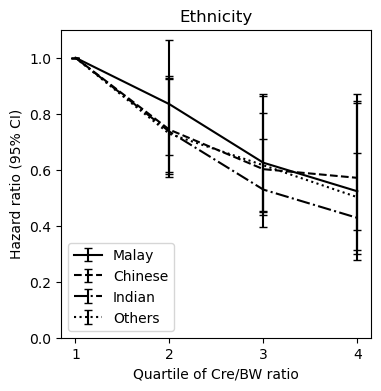

In [10]:
# Filter for ethinicity
df_malay = df[df['group'] == 'Malay']
df_chinese = df[df['group'] == 'Chinese']
df_indian = df[df['group'] == 'Indian']
df_others = df[df['group'] == 'Others']

# Create a line plot with error bars
plt.figure(figsize=(4, 4))

# Plot for Malay group
plt.errorbar(df_malay['Quartile'], df_malay['HR'], 
             yerr=[df_malay['y_err_lower'], df_malay['y_err_upper']],
             color='#000000', capsize=3, label='Malay', linestyle='-')

# Plot for Chinese group
plt.errorbar(df_chinese['Quartile'], df_chinese['HR'], 
             yerr=[df_chinese['y_err_lower'], df_chinese['y_err_upper']],
             color='#000000', capsize=3, label='Chinese', linestyle='--')

# Plot for Indian group
plt.errorbar(df_indian['Quartile'], df_indian['HR'], 
             yerr=[df_indian['y_err_lower'], df_indian['y_err_upper']],
             color='#000000', capsize=3, label='Indian', linestyle='-.')

# Plot for others group
plt.errorbar(df_others['Quartile'], df_others['HR'], 
             yerr=[df_others['y_err_lower'], df_others['y_err_upper']],
             color='#000000', capsize=3, label='Others', linestyle=':')

# Set plot title and labels
plt.title('Ethnicity')
plt.xlabel('Quartile of Cre/BW ratio')
plt.ylabel('Hazard ratio (95% CI)')
plt.ylim(0, 1.1)
plt.xticks([1, 2, 3, 4]) 
plt.grid(False)

# Add legend
plt.legend()

# Save the plot
plt.savefig(out_path + "hr_ethnic.pdf", bbox_inches="tight", dpi=600)
plt.show()

### Fig. 4: Kaplan-Meier curve

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Function to plot Kaplan-Meier curve
def plot_kaplan_meier(df, x, y, x_lab, y_lab, title, figsize=(6, 6), out_path=None):
    """
    Plot Kaplan-Meier survival curves.

    Parameters:
    df : pandas DataFrame
        The data frame containing the necessary columns.
    x : str
        The column name representing the time (duration) data.
    y : str
        The column name representing the event data (e.g., survival probability).
    x_lab : str
        The label for the x-axis.
    y_lab : str
        The label for the y-axis.
    title : str
        The title of the plot.
    figsize : tuple
        The size of the figure, default is (6, 6).
    out_path : str, optional
        Path to save the plot as a file (if provided).
    """
    
    # Initialize the Kaplan-Meier fitter
    kmf = KaplanMeierFitter()

    # Create a figure for the plot
    plt.figure(figsize=figsize)

    # Sort the quartiles to ensure correct order in the legend
    sorted_quartiles = sorted(df['Quartiles'].unique())

    # Loop through each quartile and plot its survival curve in the correct order
    for quartile in sorted_quartiles:
        # Select the subset of data for the current quartile
        mask = df['Quartiles'] == quartile
        durations = df[x][mask]
        event_observed = df[y][mask]

        # Fit the Kaplan-Meier curve
        kmf.fit(durations, event_observed, label=f"Quartile {quartile}")

        # Plot the curve
        kmf.plot_survival_function(ci_show=False)

    # Add plot labels and title
    plt.title(title, fontsize=16)
    plt.xlabel(x_lab, fontsize=12)
    plt.ylabel(y_lab, fontsize=12)
    plt.grid(False)

    # Save the figure if output path is provided
    if out_path:
        plt.savefig(out_path, bbox_inches='tight', dpi=600)

    # Show the plot
    plt.show()

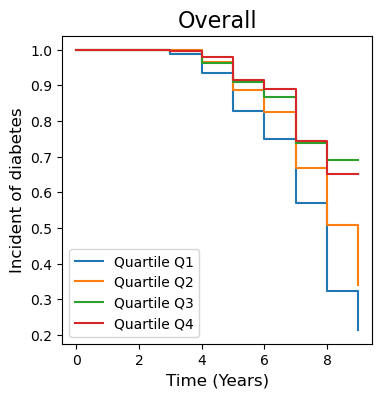

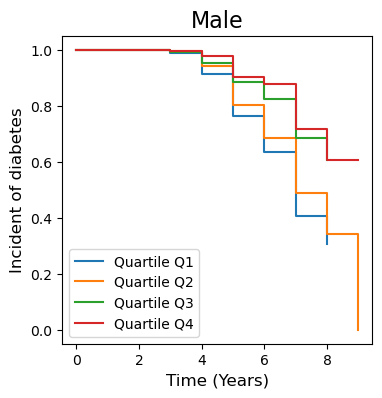

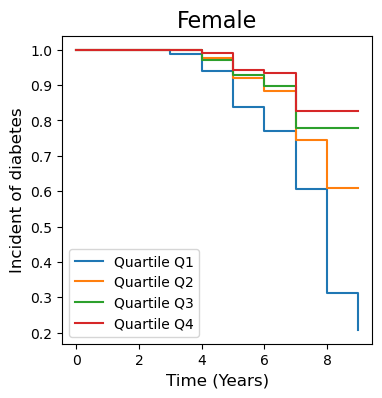

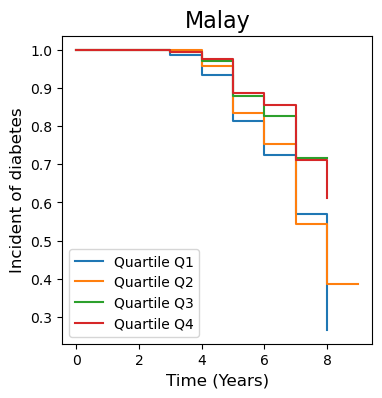

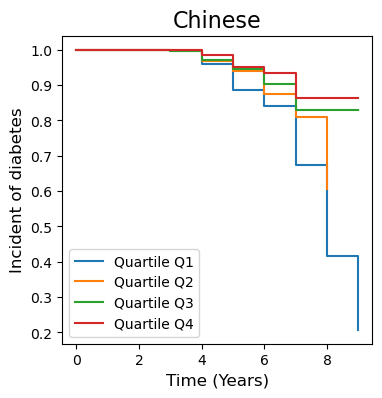

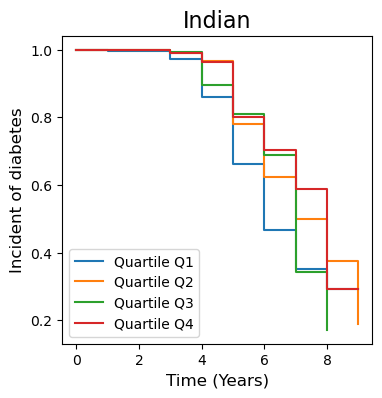

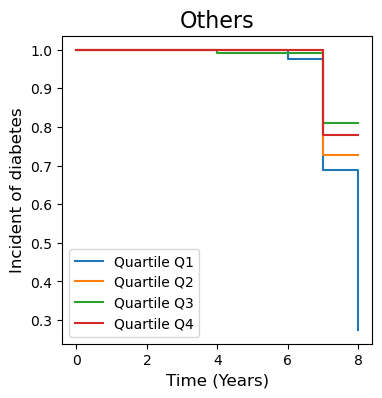

In [12]:
df = pd.read_csv(data_path + "kaplan.csv")
df['Overal_Diabetes_FU'] = df['Overal_Diabetes_FU'].map({'Yes': 1, 'No': 0})

# Overall
plot_kaplan_meier(df,
                  x='T2D_Duration',
                  y='Overal_Diabetes_FU',
                  x_lab='Time (Years)',
                  y_lab='Incident of diabetes',
                  title='Overall',
                  figsize=(4, 4),
                  out_path= out_path + 'overall_kaplan.pdf')

# Male
df_male = df[df['Gender'] == 'Male']
plot_kaplan_meier(df_male,
                  x='T2D_Duration',
                  y='Overal_Diabetes_FU',
                  x_lab='Time (Years)',
                  y_lab='Incident of diabetes',
                  title='Male',
                  figsize=(4, 4),
                  out_path= out_path + 'male_kaplan.pdf')


# Female
df_female = df[df['Gender'] == 'Female']
plot_kaplan_meier(df_female,
                  x='T2D_Duration',
                  y='Overal_Diabetes_FU',
                  x_lab='Time (Years)',
                  y_lab='Incident of diabetes',
                  title='Female',
                  figsize=(4, 4),
                  out_path= out_path + 'female_kaplan.pdf')

# Malay
df_malay = df[df['Kaum_Race'] == 'Malay']
plot_kaplan_meier(df_malay,
                  x='T2D_Duration',
                  y='Overal_Diabetes_FU',
                  x_lab='Time (Years)',
                  y_lab='Incident of diabetes',
                  title='Malay',
                  figsize=(4, 4),
                  out_path= out_path + 'malay_kaplan.pdf')

# Chinese
df_chinese = df[df['Kaum_Race'] == 'Chinese']
plot_kaplan_meier(df_chinese,
                  x='T2D_Duration',
                  y='Overal_Diabetes_FU',
                  x_lab='Time (Years)',
                  y_lab='Incident of diabetes',
                  title='Chinese',
                  figsize=(4, 4),
                  out_path= out_path + 'chinese_kaplan.pdf')

# Indian
df_indian = df[df['Kaum_Race'] == 'Indian']
plot_kaplan_meier(df_indian,
                  x='T2D_Duration',
                  y='Overal_Diabetes_FU',
                  x_lab='Time (Years)',
                  y_lab='Incident of diabetes',
                  title='Indian',
                  figsize=(4, 4),
                  out_path= out_path + 'indian_kaplan.pdf')

# Others
df_others = df[df['Kaum_Race'] == 'Others']
plot_kaplan_meier(df_others,
                  x='T2D_Duration',
                  y='Overal_Diabetes_FU',
                  x_lab='Time (Years)',
                  y_lab='Incident of diabetes',
                  title='Others',
                  figsize=(4, 4),
                  out_path= out_path + 'others_kaplan.pdf')

### Fig. 5: Spearman correlation scatter plot

-0.6334941972185816 0.0


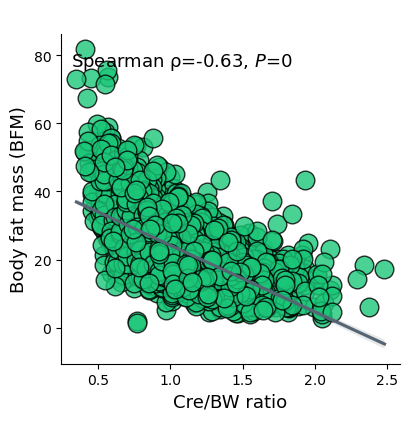

In [14]:
# Relationship between skeletal muscle mass, body fat mass, and cre/bw

ax = sns.lmplot(
    x="Cre_to_BW",
    y="BFM",
    data=cre_spear,
    scatter_kws={"s": 180, "color": "#1bc779", "edgecolor": "black"},
    line_kws={"color": "#566573"},
    legend=False,
    height=4.2,
    aspect=1.2,
)
ax.fig.suptitle("", size=15, fontweight="bold", style="italic")
r, p = stats.spearmanr(list(cre_spear["Cre_to_BW"]), list(cre_spear["BFM"]))
print(r, p)
g = plt.gca()
g.text(
    0.03,
    0.9,
    "Spearman ρ={:.2f}, $P$={:.2g}".format(r, p),
    transform=g.transAxes,
    fontsize=13,
    color="black",
)

ax.fig.set_size_inches(4, 4)

plt.xlabel("Cre/BW ratio", size=13)
plt.ylabel("Body fat mass (BFM)", size=13)
plt.title(" ", size=15)

plt.savefig(out_path + "crebw_bfm_corr.pdf", bbox_inches="tight", dpi=600)
plt.show()

0.08176414374554977 1.2078283274835872e-07


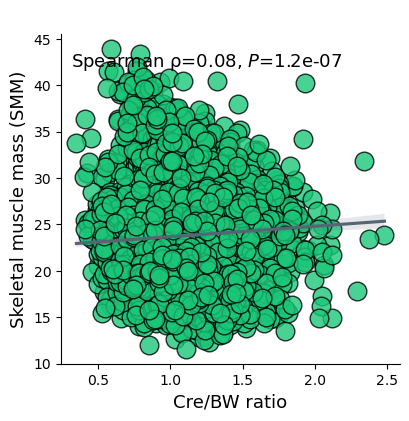

In [13]:
# Relationship between skeletal muscle mass, body fat mass, and cre/bw
cre_spear = pd.read_csv(data_path + "cre_spear.csv")

# Drop missing data
cre_spear = cre_spear[cre_spear['BFM'] != 0]
cre_spear = cre_spear[cre_spear['SMM'] != 0]
cre_spear = cre_spear[cre_spear['Cre_to_BW'] != 0]

ax = sns.lmplot(
    x="Cre_to_BW",
    y="SMM",
    data=cre_spear,
    scatter_kws={"s": 180, "color": "#1bc779", "edgecolor": "black"},
    line_kws={"color": "#566573"},
    legend=False,
    height=4.2,
    aspect=1.2,
)
ax.fig.suptitle("", size=15, fontweight="bold", style="italic")
r, p = stats.spearmanr(list(cre_spear["Cre_to_BW"]), list(cre_spear["SMM"]))
print(r, p)
g = plt.gca()
g.text(
    0.03,
    0.9,
    "Spearman ρ={:.2f}, $P$={:.2g}".format(r, p),
    transform=g.transAxes,
    fontsize=13,
    color="black",
)

ax.fig.set_size_inches(4, 4)

plt.xlabel("Cre/BW ratio", size=13)
plt.ylabel("Skeletal muscle mass (SMM)", size=13)
plt.title(" ", size=15)

plt.savefig(out_path + "crebw_smm_corr.pdf", bbox_inches="tight", dpi=600)
plt.show()